# Agenda

- Dataset Exploration
- Dataset Visualisation
- Recommendation using Random walks (Next week)
- Prediction using supervised learning approaches(Next week)

## 1. Introduction to the TED Talks dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [1]:
import pandas as pd
pd.__version__

'0.24.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
ted = pd.read_csv('ted_main.csv')

In [4]:
# each row represents a single talk
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### count of rows and columns

In [5]:
# rows, columns
%load shape.py

(2550, 17)

### type of each elemnt in the column

In [6]:
# object columns are usually strings, but can also be arbitrary Python objects (lists, dictionaries)
# type of each elemnt in the column
%load types.py

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

### count the number of missing values in each column

In [7]:
# count the number of missing values in each column
%load nanCounter.py

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [8]:
print (ted['languages'][ted['languages'] == 0].count())
ted[ted['languages'] == 0].head()

86


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
58,222,"Two Pilobolus dancers perform ""Symbiosis."" Doe...",825,TED2005,1109289600,0,Pilobolus,"Pilobolus: A dance of ""Symbiosis""",1,1170979860,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}...","[{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...",Dance company,"['dance', 'entertainment', 'nature', 'performa...","A dance of ""Symbiosis""",https://www.ted.com/talks/pilobolus_perform_sy...,3051507
115,27,The avant-garde string quartet Ethel performs ...,214,TED2006,1138838400,0,Ethel,"Ethel: A string quartet plays ""Blue Room""",1,1182184140,"[{'id': 1, 'name': 'Beautiful', 'count': 216},...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",String quartet,"['cello', 'collaboration', 'culture', 'enterta...","A string quartet plays ""Blue Room""",https://www.ted.com/talks/ethel_performs_blue_...,384641
135,36,After Vusi Mahlasela's 3-song set at TEDGlobal...,299,TEDGlobal 2007,1181260800,0,Vusi Mahlasela,"Vusi Mahlasela: ""Woza""",1,1187695440,"[{'id': 8, 'name': 'Informative', 'count': 4},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...","Musician, activist","['Africa', 'entertainment', 'guitar', 'live mu...","""Woza""",https://www.ted.com/talks/vusi_mahlasela_s_enc...,416603
209,67,"Rokia Traore sings the moving ""M'Bifo,"" accomp...",419,TEDGlobal 2007,1181088000,0,Rokia Traore,"Rokia Traore: ""M'Bifo""",1,1206580680,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 5...","[{'id': 265, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'entertainment', 'guitar', 'live mu...","""M'Bifo""",https://www.ted.com/talks/rokia_traore_sings_m...,294936
237,43,"Singer-songwriter Rokia Traore performs ""Kouna...",386,TEDGlobal 2007,1181088000,0,Rokia Traore,"Rokia Traore: ""Kounandi""",1,1212627600,"[{'id': 22, 'name': 'Fascinating', 'count': 84...","[{'id': 186, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'guitar', 'live music', 'music', 's...","""Kounandi""",https://www.ted.com/talks/rokia_traore_sings_k...,82488


In [9]:
ted['languages'] = ted['languages'].replace(0, 1)

In [10]:
ted[ted["languages"]==0] = 1

## 2. Which talks provoke the most online discussion?

### sort by the number of first-level comments, though this is biased in favor of older talks

In [11]:
%load commentSort.py

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2407,5,Grammy-winning Silk Road Ensemble display thei...,389,TED2016,1455494400,1,Silk Road Ensemble,"Silk Road Ensemble: ""Turceasca""",1,1489759215,"[{'id': 1, 'name': 'Beautiful', 'count': 80}, ...","[{'id': 2611, 'hero': 'https://pe.tedcdn.com/i...",Musical explorers,"['art', 'live music', 'music', 'performance']","""Turceasca""",https://www.ted.com/talks/silk_road_ensemble_t...,640734
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174


### correct for the bias by calculating the number of comments per view

In [12]:
%load commentsPerView.py

In [13]:
# interpretation: for every view of the same-sex marriage talk, there are 0.002 comments
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,1,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [14]:
# make this more interpretable by inverting the calculation
ted['views_per_comment'] = ted.views / ted.comments

In [15]:
# interpretation: 1 out of every 450 people leave a comment
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,1,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360,735.525682


Lessons:

1. Consider the limitations and biases of your data when analyzing it
2. Make your results understandable

## 3. Visualize the distribution of comments

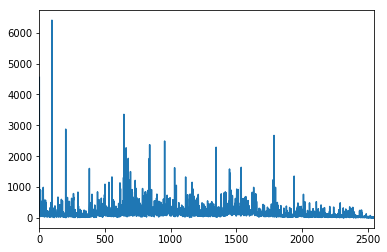

In [16]:
# line plot is not appropriate here (use it to measure something over time)
ted.comments.plot()

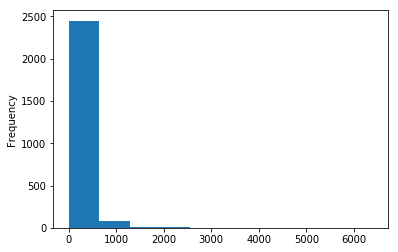

In [17]:
# histogram shows the frequency distribution of a single numeric variable
ted.comments.plot(kind='hist')

### modify the plot by filtering the data with a minimum threshold to be more informative

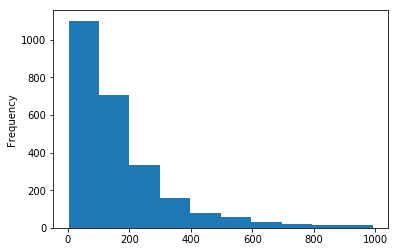

In [19]:
# %load filterData.py
ted[ted.comments < 1000].comments.plot(kind='hist')

In [20]:
# check how many observations we removed from the plot
ted[ted.comments >= 1000].shape

(32, 19)

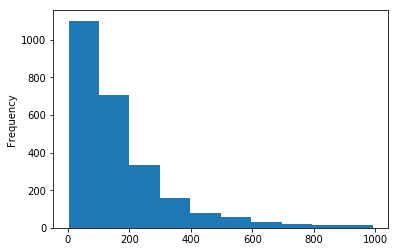

In [21]:
# can also write this using the query method
ted.query('comments < 1000').comments.plot(kind='hist')

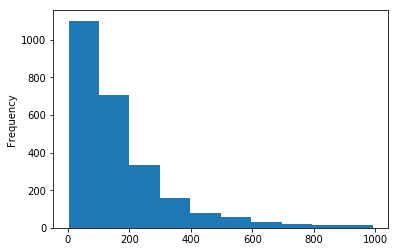

In [22]:
# can also write this using the loc accessor
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

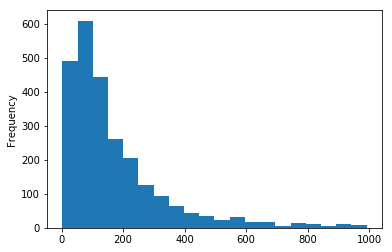

In [23]:
# increase the number of bins to see more detail
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

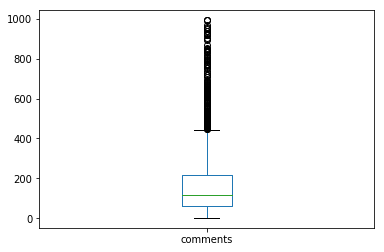

In [24]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

Lessons:

1. Choose your plot type based on the question you are answering and the data type(s) you are working with
2. Use pandas one-liners to iterate through plots quickly
3. Try modifying the plot defaults
4. Creating plots involves decision-making

### Top 15 speakers grouped based on profession

[Text(0.5, 1.0, "top 15 speaker's occupation")]

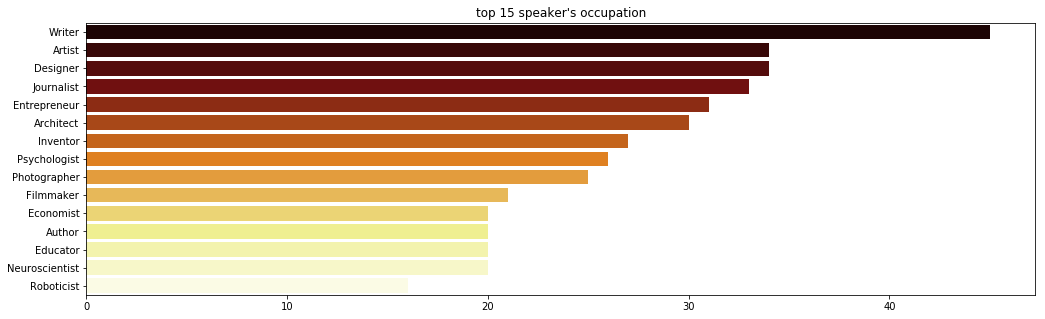

In [25]:
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(y=ted['speaker_occupation'].value_counts(ascending=False).head(15).index, 
              x=ted['speaker_occupation'].value_counts(ascending=False).head(15).values, ax=ax, palette='afmhot')
a.set(title="top 15 speaker's occupation")

### top 10 speakers perform more than once

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
784,342,Hans Rosling reframes 10 years of UN data with...,934,TEDxChange,1284940800,33,Hans Rosling,Hans Rosling: The good news of the decade? We'...,1,1286442720,"[{'id': 8, 'name': 'Informative', 'count': 554...","[{'id': 540, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['Africa', 'TEDx', 'data', 'global development...",The good news of the decade? We're winning the...,https://www.ted.com/talks/hans_rosling_the_goo...,738895,0.000463,2160.511696
447,125,Hans Rosling unveils data visuals that untangl...,602,TED2009,1233878400,40,Hans Rosling,"Hans Rosling: Insights on HIV, in stunning dat...",1,1242197400,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 499, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['AIDS', 'Africa', 'disease', 'global issues',...","Insights on HIV, in stunning data visuals",https://www.ted.com/talks/hans_rosling_the_tru...,904813,0.000138,7238.504000
502,122,Talking at the US State Department this summer...,1196,TED@State,1244073600,33,Hans Rosling,Hans Rosling: Let my dataset change your mindset,1,1251334800,"[{'id': 22, 'name': 'Fascinating', 'count': 61...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Africa', 'Asia', 'data', 'global development...",Let my dataset change your mindset,https://www.ted.com/talks/hans_rosling_at_state\n,1471039,0.000083,12057.696721
558,276,Hans Rosling was a young guest student in Indi...,950,TEDIndia 2009,1257292800,36,Hans Rosling,Hans Rosling: Asia's rise -- how and when,1,1258938000,"[{'id': 22, 'name': 'Fascinating', 'count': 77...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Asia', 'economics', 'health', 'india', 'stat...",Asia's rise -- how and when,https://www.ted.com/talks/hans_rosling_asia_s_...,1738069,0.000159,6297.351449
1239,491,Hans Rosling had a question: Do some religions...,800,TEDxSummit,1334534400,36,Hans Rosling,Hans Rosling: Religions and babies,1,1337698856,"[{'id': 22, 'name': 'Fascinating', 'count': 86...","[{'id': 1418, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['TEDx', 'data', 'global issues', 'population'...",Religions and babies,https://www.ted.com/talks/hans_rosling_religio...,2138419,0.000230,4355.232179
893,268,What was the greatest invention of the industr...,555,TEDWomen 2010,1291420800,46,Hans Rosling,Hans Rosling: The magic washing machine,1,1300714380,"[{'id': 9, 'name': 'Ingenious', 'count': 457},...","[{'id': 620, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'economics', 'women']",The magic washing machine,https://www.ted.com/talks/hans_rosling_and_the...,2391977,0.000112,8925.287313
726,607,The world's population will grow to 9 billion ...,604,TED@Cannes,1277078400,46,Hans Rosling,"Hans Rosling: Global population growth, box by...",1,1278663300,"[{'id': 22, 'name': 'Fascinating', 'count': 76...","[{'id': 695, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'demo', 'global issues', '...","Global population growth, box by box",https://www.ted.com/talks/hans_rosling_on_glob...,2934262,0.000207,4834.039539
117,261,Researcher Hans Rosling uses his cool data too...,1137,TED2007,1172880000,35,Hans Rosling,Hans Rosling: New insights on poverty,1,1182762720,"[{'id': 1, 'name': 'Beautiful', 'count': 218},...","[{'id': 494, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'economics', 'glo...",New insights on poverty,https://www.ted.com/talks/hans_rosling_reveals...,3243784,0.000080,12428.291188
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans 

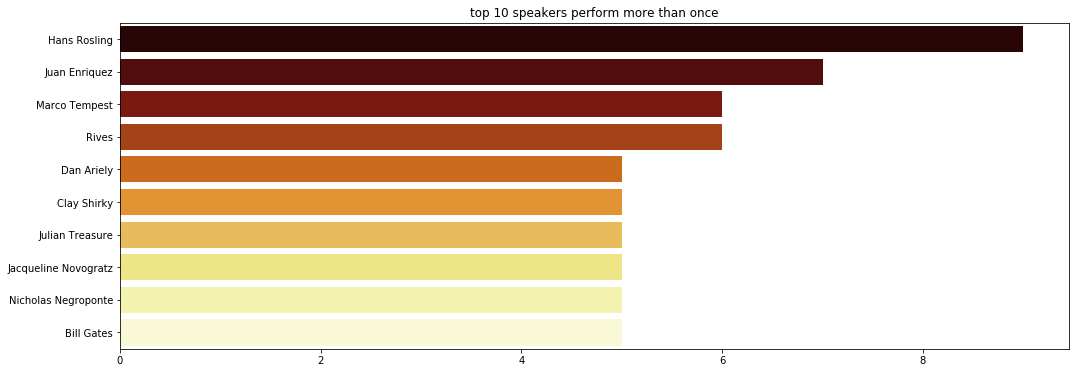

In [26]:
fig,ax=plt.subplots(figsize=(17,6))
a=sns.barplot(y=ted['main_speaker'].value_counts(ascending=False).head(10).index, 
              x=ted['main_speaker'].value_counts(ascending=False).head(10).values, ax=ax, palette='afmhot')
a.set(title="top 10 speakers perform more than once")

ted[ted.main_speaker=='Hans Rosling'].sort_values(by='views')


## 4. Plot the number of talks that took place each year

In [27]:
# Which are the columns that can be used for the task
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comment'],
      dtype='object')

### dealing with date and time in pandas

In [29]:
# %load dateTime.py
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

[pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

### How to fix the date and time format

In [31]:
# %load dateTimeFix.py
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

### Bonus exercise: calculate the average delay between filming and publishing

In [ ]:
# 

In [32]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [33]:
# verify that event name matches film_datetime for a random sample
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
228,TED2008,2008-03-03
479,TED2009,2009-02-05
1344,TEDxDublin,2012-09-02
960,TEDxBG,2011-01-08
294,TED2008,2008-03-01


In [34]:
# new column uses the datetime data type (this was an automatic conversion)
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

### Extract year from the film_datetime column

In [36]:
# %load yearExtract.py
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

### count the number of talks each year using value_counts()

In [38]:
# %load yearCount.py
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

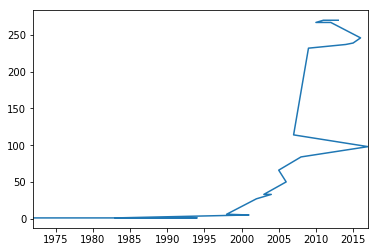

In [39]:
# points are plotted and connected in the order you give them to pandas
ted.film_datetime.dt.year.value_counts().plot()

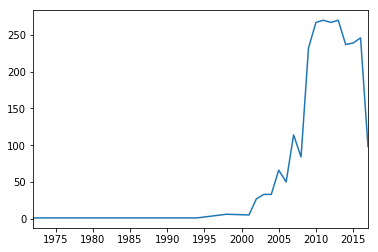

In [40]:
# need to sort the index before plotting
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [41]:
# we only have partial data for 2017
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

Lessons:

1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant

## 5. What were the "best" events in TED history to attend?

In [42]:
# count the number of talks (great if you value variety, but they may not be great talks)
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [43]:
# use views as a proxy for "quality of talk"
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [44]:
# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [45]:
# show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [46]:
# calculate the total views per event
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


Lessons:

1. Think creatively for how you can use the data you have to answer your question
2. Watch out for small sample sizes

## 6. Unpack the ratings data

In [47]:
# previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [48]:
# two ways to examine the ratings data for the first talk
ted.loc[0, 'ratings']
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [49]:
# this is a string not a list
type(ted.ratings[0])

str

In [50]:
# convert this into something useful using Python's ast module (Abstract Syntax Tree)
import ast

In [51]:
# literal_eval() allows you to evaluate a string containing a Python literal or container
ast.literal_eval('[1, 2, 3]')

[1, 2, 3]

In [52]:
# if you have a string representation of something, you can retrieve what it actually represents
type(ast.literal_eval('[1, 2, 3]'))

list

In [53]:
# unpack the ratings data for the first talk
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [54]:
# now we have a list (of dictionaries)
type(ast.literal_eval(ted.ratings[0]))

list

In [55]:
# define a function to convert an element in the ratings Series from string to list
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [56]:
# test the function
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [57]:
# Series apply method applies a function to every element in a Series and returns a Series
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [58]:
# lambda is a shorter alternative
ted.ratings.apply(lambda x: ast.literal_eval(x)).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [59]:
# an even shorter alternative is to apply the function directly (without lambda)
ted.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [60]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [61]:
# check that the new Series looks as expected
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [62]:
# each element in the Series is a list
type(ted.ratings_list[0])

list

In [63]:
# data type of the new Series is object
ted.ratings_list.dtype

dtype('O')

In [64]:
# object is not just for strings
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

In [65]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime,ratings_list
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,8487.750000,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,...,"[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,0.000032,30781.846726,2006-02-02,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'..."
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,...,"[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,0.000244,4102.270947,2006-02-24,"[{'id': 3, 'name': 'Courageous', 'count': 477}..."
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,...,"[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,21037.847826,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},..."
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,...,"[{'id'

In [67]:
rating_names = set()
for index, row in ted.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])
    
print (rating_names)

{'Jaw-dropping', 'Inspiring', 'Longwinded', 'Funny', 'Confusing', 'Informative', 'Fascinating', 'Ingenious', 'Persuasive', 'Courageous', 'Obnoxious', 'Unconvincing', 'Beautiful', 'OK'}


In [75]:
from collections import defaultdict

rating_data = defaultdict(list)
for index, row in ted.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['Talk_ID'].append(index)
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()



,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [76]:
rating_data['total'] = rating_data.sum(axis = 1)
rating_data = rating_data.sort_values('total', ascending=False)  
rating_data

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850
201,201,966,9437,1228,7842,398,289,5430,14447,550,1704,10464,636,356,16918,70866
1346,1346,938,3232,1428,6305,338,197,9787,11111,335,6217,3586,1129,155,21210,67314
837,837,5225,7942,1094,8280,283,155,4561,4638,233,3510,2100,500,113,21444,60915
677,677,390,1640,3413,1161,390,112,6600,7440,930,8845,2659,1341,294,21564,57456
1030,1030,783,3854,1197,4151,158,138,1368,3364,201,2606,2051,863,134,17290,39188
1129,1129,7315,1007,1162,471,78,61,3886,2529,82,3426,683,206,61,11213,33309
1163,1163,1049,2467,830,3944,163,83,3623,3157,147,3365,442,469,80,10218,31200
530,530,713,5607,744,2817,109,85,2687,2983,103,3002,948,333,78,9566,30305
176,176,815,5201,543,216,79,95,3875,8448,80,236,8328,322,126,1647,30187


In [79]:
def column_percentage(column):
    return (column/rating_data['total'])*100

rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] = \
    rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')].apply(column_percentage)

rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,0,0.000024,0.000006,0.000007,0.000004,4.681749e-07,2.927605e-07,0.000009,0.000013,3.629263e-07,0.000013,0.000005,0.000001,2.528386e-07,0.000030,93850
201,201,0.000003,0.000027,0.000003,0.000022,1.118328e-06,8.120525e-07,0.000015,0.000041,1.545429e-06,0.000005,0.000029,0.000002,1.000314e-06,0.000048,70866
1346,1346,0.000003,0.000011,0.000005,0.000021,1.108155e-06,6.458773e-07,0.000032,0.000036,1.098319e-06,0.000020,0.000012,0.000004,5.081776e-07,0.000070,67314
837,837,0.000023,0.000035,0.000005,0.000037,1.252027e-06,6.857392e-07,0.000020,0.000021,1.030821e-06,0.000016,0.000009,0.000002,4.999260e-07,0.000095,60915
677,677,0.000002,0.000009,0.000018,0.000006,2.056167e-06,5.904891e-07,0.000035,0.000039,4.903168e-06,0.000047,0.000014,0.000007,1.550034e-06,0.000114,57456


/Users/amrk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Text(0, 0.5, 'Percentage of Votes')

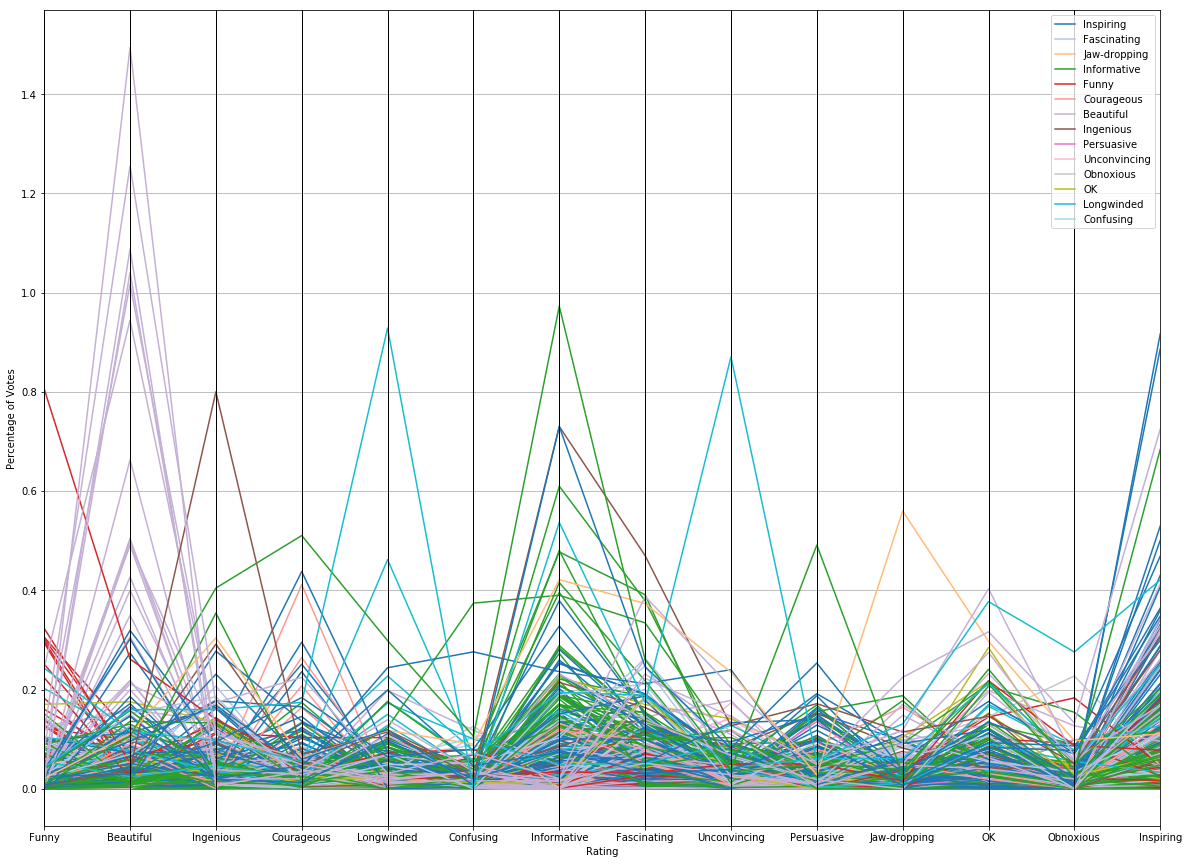

In [99]:


rating_values = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] 
rating_data['main_rating'] = rating_values.apply(np.argmax, axis = 1)

rating_data['main_rating'].head()


from pandas.plotting import parallel_coordinates
rating_values_updated = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')]
plt.figure(figsize=(20,15))
parallel_coordinates(rating_values_updated, 'main_rating', colormap=plt.get_cmap("tab20"))
plt.xlabel("Rating")
plt.ylabel("Percentage of Votes")

In [103]:
ted_basic_info = ted[[ 'title', 'duration','comments','views','languages']]

In [109]:
rating_and_basic = ted_basic_info.merge(rating_data, how = 'left', right_on = 'Talk_ID', left_index=True)
rating_and_basic

,title,duration,comments,views,languages,Talk_ID,Funny,Beautiful,Ingenious,Courageous,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total,main_rating
0,Do schools kill creativity?,1164,4553,47227110,60,0,0.000024,0.000006,0.000007,0.000004,...,0.000009,0.000013,3.629263e-07,0.000013,0.000005,0.000001,2.528386e-07,0.000030,93850,Inspiring
1,Averting the climate crisis,977,265,3200520,43,1,0.021473,0.002289,0.002210,0.005487,...,0.017486,0.005210,1.018375e-02,0.010578,0.004579,0.008013,5.170820e-03,0.016302,2937,Funny
2,Simplicity sells,1286,124,1636292,26,2,0.042713,0.002658,0.008108,0.001994,...,0.017502,0.007355,4.608047e-03,0.010191,0.002393,0.006469,6.291756e-03,0.010191,2826,Funny
3,Greening the ghetto,1116,200,1697550,35,3,0.001136,0.005603,0.002022,0.014633,...,0.007317,0.002542,6.931492e-04,0.008857,0.004428,0.001637,6.738951e-04,0.020602,3731,Inspiring
4,The best stats you've ever seen,1190,593,12005869,48,4,0.000083,0.000056,0.000190,0.000019,...,0.000323,0.000274,3.982300e-06,0.000151,0.000222,0.000015,3.625677e-06,0.000172,25624,Informative
5,Why we do what we do,1305,672,20685401,36,5,0.000304,0.000195,0.000110,0.000199,...,0.000286,0.000372,1.040119e-04,0.000668,0.000185,0.000122,9.242434e-05,0.001438,15361,Inspiring
6,Letting go of God,992,919,3769987,31,6,0.011477,0.001280,0.001479,0.002204,...,0.001044,0.001460,1.039586e-03,0.001437,0.000282,0.001423,1.339911e-03,0.002024,6004,Funny
7,Behind the design of Seattle's library,1198,46,967741,19,7,0.008212,0.089423,0.177934,0.031024,...,0.110410,0.139610,2.372452e-02,0.033762,0.052011,0.057486,4.562407e-03,0.159684,1031,Ingenious
8,Let's teach religion -- all religion -- in sch...,1485,852,2567958,32,8,0.000971,0.002346,0.003413,0.009091,...,0.010078,0.005063,4.578007e-03,0.012359,0.000971,0.002491,1.342666e-03,0.007134,3954,Persuasive
9,A life of purpose,1262,900,3095993,31,9,0.000045,0.001324,0.000200,0.000822,...,0.000525,0.000792,1.446675e-03,0.002664,0.000361,0.000423,6.404729e-04,0.004413,8336,Inspiring


(0, 10000000)

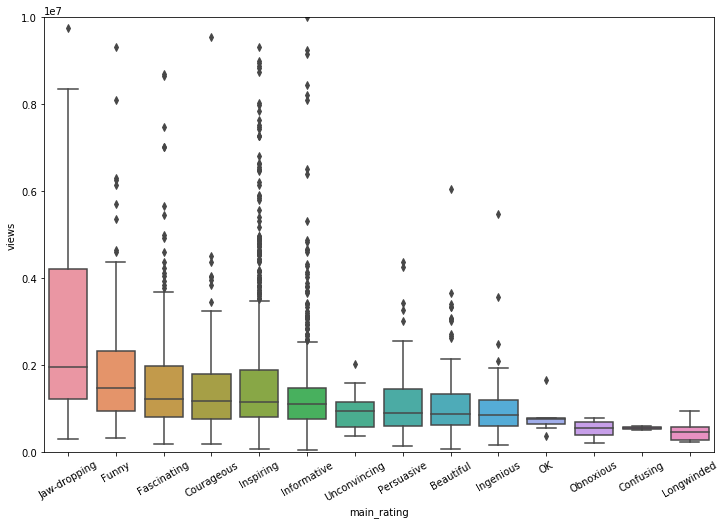

In [110]:
list_ordered_by_median = rating_and_basic.groupby('main_rating')['views'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="views", data=rating_and_basic, order = list_ordered_by_median)
plt.xticks(rotation=30)
plt.ylim((0,10000000))


(0, 1000)

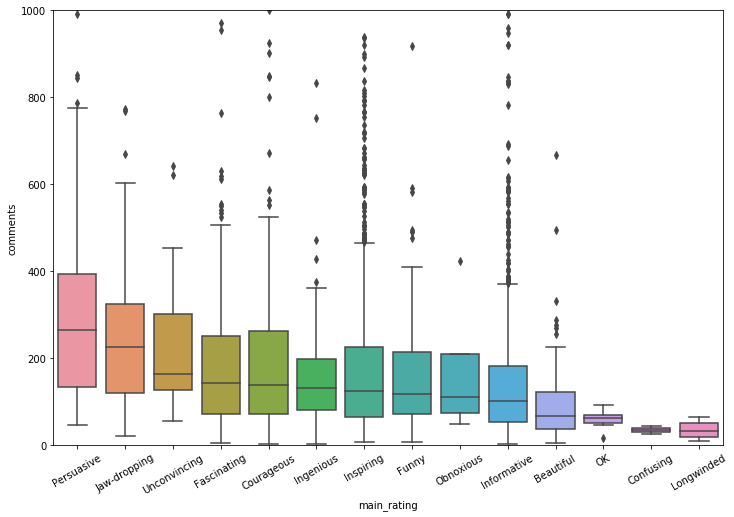

In [111]:
list_ordered_by_median_com = rating_and_basic.groupby('main_rating')['comments'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="comments", data=rating_and_basic, order = list_ordered_by_median_com)
plt.xticks(rotation=30)
plt.ylim((0,1000))

Text(0.5, 1.0, 'Heatmap of Correlation between Features')

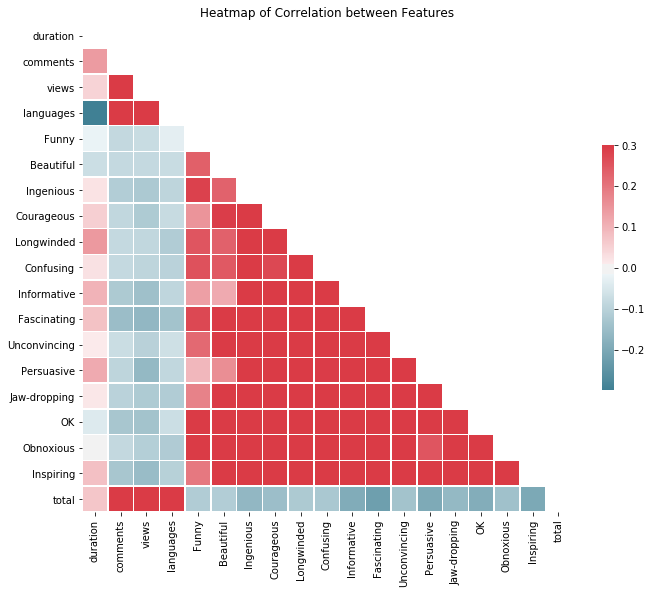

In [112]:
#Features to remove from the plot:
features_to_remove = ['Talk_ID', 'title']
corr = rating_and_basic.drop(features_to_remove, axis = 1).corr() 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features')


In [127]:
import re

tags_data = defaultdict(list)
for index, row in ted.iterrows():
    themes = ast.literal_eval(row['tags'])
    for item in themes:
        tags_data['Talk_ID'].append(index)
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

print (len(tags_data))
print (len(tags_data['tags'].unique()))
tags_data.head()

mult_occupation = re.compile(r'\/|\,|\;|\+| and ')
end_issue = re.compile(r' \.\.\.')
occupation_data = defaultdict(list)
ignore_cases_list = ['HIV/AIDS fighter','9/11 mothers']

for index, row in ted.iterrows():
    occupation = row['speaker_occupation']
    problem_found = False
    if mult_occupation.search(occupation):
        problem_found = True
    if problem_found & (occupation not in ignore_cases_list):
        occupation = re.split('\/|\,|\;|\+| and ', occupation)
        for item in occupation:
            occupation_data['Talk_ID'].append(index)
            if end_issue.search(item):
                item = item.strip(' ...')
            occupation_data['speaker_occupation'].append(item.strip().lower())
    #All strings were converted to lowercase in order to avoid the same word in different formats.
    else:
        occupation_data['Talk_ID'].append(index)
        occupation_data['speaker_occupation'].append(occupation.lower())

occupation_data = pd.DataFrame(occupation_data)


tags_rating = rating_data.merge(tags_data, how = 'left', on = ['Talk_ID'])
occupation_rating = rating_data.merge(occupation_data, how = 'left', on = ['Talk_ID'])


19154
416


In [125]:
ted["speaker_occupation"] = ted["speaker_occupation"].astype(str)
ted["speaker_occupation"].dtype

dtype('O')

In [129]:
def find_common_var(rating, var):
    #finds the main tags or speakers occupation
    if var == 'tags':
        count_tags = tags_rating[tags_rating['main_rating'] == rating]['tags'].value_counts()
    else:
        count_tags = occupation_rating[occupation_rating['main_rating'] ==\
                                       rating]['speaker_occupation'].value_counts()
    return count_tags


def main_tags_or_occupation(search):
    #var should be tags or speakers_occupation
    #Find the five main tags/occupation for each main rating and save in a set
    main_var_set = set()
    for name in rating_names:
        main_var_set.update(find_common_var(name, search).head().index)

    #Create a dataframe with the tags/occupation and values for each main rating
    rating_main_var = defaultdict(list)
    for name in rating_names:
        current_rating_table = find_common_var(name, search).head()
        main_var = current_rating_table.index
        rating_main_var['rating'].append(name)
        for var in main_var_set:
            if var not in main_var:
                rating_main_var[var].append(0)
            else:
                rating_main_var[var].append(current_rating_table[var])
    return rating_main_var

rating_main_tags = main_tags_or_occupation('tags')
rating_main_tags = pd.DataFrame(rating_main_tags)  



In [130]:
rating_main_tags = rating_main_tags.set_index('rating')
rating_main_tags.head()

,illness,business,medicine,global issues,live music,cities,invention,TEDx,culture,biology,...,film,society,design,activism,art,comedy,architecture,science,entertainment,social change
rating,,,,,,,,,,,,,,,,,,,,,
Jaw-dropping,0,0,0,0,0,0,0,0,0,0,...,0,0,16,0,0,0,0,10,22,0
Inspiring,0,142,0,217,0,0,0,156,200,0,...,0,0,0,0,0,0,0,0,0,0
Longwinded,0,3,0,0,0,0,0,0,3,0,...,0,0,7,0,0,0,4,0,0,0
Funny,0,0,0,0,0,0,0,0,43,0,...,0,0,31,0,0,41,0,0,70,0
Confusing,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


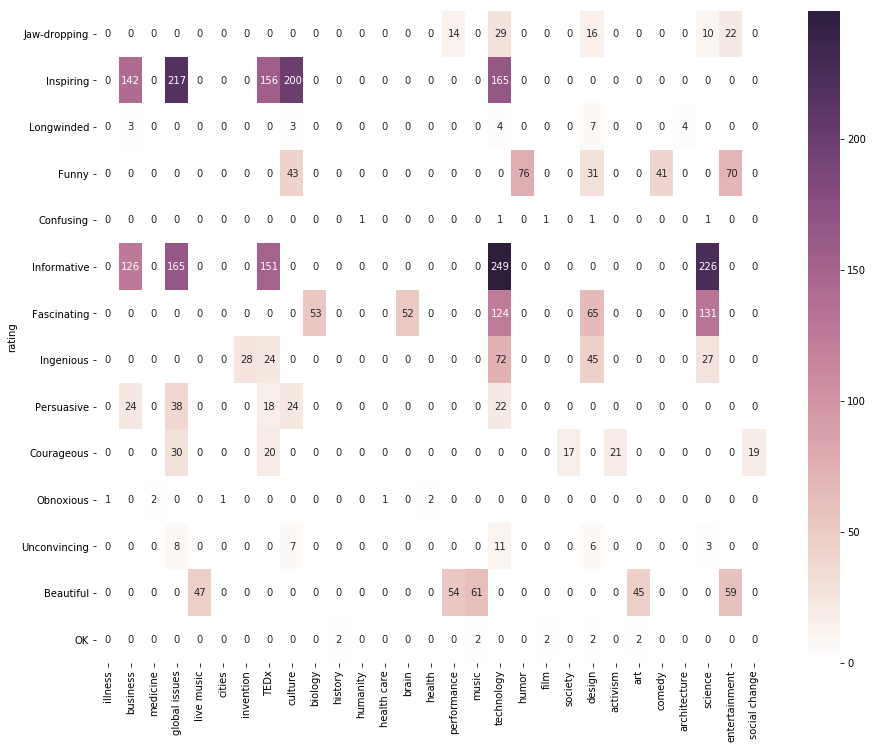

In [131]:


f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.heatmap(rating_main_tags, annot = True, fmt = "d", cmap = cmap)



## load the transcripts

In [133]:
transcripts = pd.read_csv("transcripts.csv")

In [136]:
combined = pd.merge(ted,transcripts,on="url")

In [139]:
transcripts.shape, combined.shape, ted.shape

((2467, 2), (2467, 22), (2550, 21))

Lessons:

1. Pay attention to data types in pandas
2. Use apply any time it is necessary

## 7. Count the total number of ratings received by each talk

Bonus exercises:

- for each talk, calculate the percentage of ratings that were negative
- for each talk, calculate the average number of ratings it received per day since it was published

In [57]:
# expected result (for each talk) is sum of count
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [58]:
# start by building a simple function
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]

In [59]:
# pass it a list, and it returns the first element in the list, which is a dictionary
get_num_ratings(ted.ratings_list[0])

{'id': 7, 'name': 'Funny', 'count': 19645}

In [60]:
# modify the function to return the vote count
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]['count']

In [61]:
# pass it a list, and it returns a value from the first dictionary in the list
get_num_ratings(ted.ratings_list[0])

19645

In [62]:
# modify the function to get the sum of count
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [63]:
# looks about right
get_num_ratings(ted.ratings_list[0])

93850

In [64]:
# check with another record
ted.ratings_list[1]

[{'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', 'count': 443},
 {'id': 10, 'name': 'Inspiring', 'count': 413},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 9, 'name': 'Ingenious', 'count': 56},
 {'id': 24, 'name': 'Persuasive', 'count': 268},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 116},
 {'id': 26, 'name': 'Obnoxious', 'count': 131},
 {'id': 25, 'name': 'OK', 'count': 203}]

In [65]:
# looks about right
get_num_ratings(ted.ratings_list[1])

2936

In [66]:
# apply it to every element in the Series
ted.ratings_list.apply(get_num_ratings).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [67]:
# another alternative is to use a generator expression
sum((d['count'] for d in ted.ratings_list[0]))

93850

In [68]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: sum((d['count'] for d in x))).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [69]:
# another alternative is to use pd.DataFrame()
pd.DataFrame(ted.ratings_list[0])['count'].sum()

93850

In [70]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum()).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [71]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [72]:
# do one more check
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

Lessons:

1. Write your code in small chunks, and check your work as you go
2. Lambda is best for simple functions

## 8. Which occupations deliver the funniest TED talks on average?

Bonus exercises:

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

### Step 1: Count the number of funny ratings

In [73]:
# "Funny" is not always the first dictionary in the list
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [74]:
# check ratings (not ratings_list) to see if "Funny" is always a rating type
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [75]:
# write a custom function
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [76]:
# examine a record in which "Funny" is not the first dictionary
ted.ratings_list[3]

[{'id': 3, 'name': 'Courageous', 'count': 760},
 {'id': 1, 'name': 'Beautiful', 'count': 291},
 {'id': 2, 'name': 'Confusing', 'count': 32},
 {'id': 7, 'name': 'Funny', 'count': 59},
 {'id': 9, 'name': 'Ingenious', 'count': 105},
 {'id': 21, 'name': 'Unconvincing', 'count': 36},
 {'id': 11, 'name': 'Longwinded', 'count': 53},
 {'id': 8, 'name': 'Informative', 'count': 380},
 {'id': 10, 'name': 'Inspiring', 'count': 1070},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 24, 'name': 'Persuasive', 'count': 460},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 230},
 {'id': 26, 'name': 'Obnoxious', 'count': 35},
 {'id': 25, 'name': 'OK', 'count': 85}]

In [77]:
# check that the function works
get_funny_ratings(ted.ratings_list[3])

59

In [78]:
# apply it to every element in the Series
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [79]:
# check for missing values
ted.funny_ratings.isna().sum()

0

### Step 2: Calculate the percentage of ratings that are funny

In [80]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [81]:
# "gut check" that this calculation makes sense by examining the occupations of the funniest talks
ted.sort_values('funny_rate').speaker_occupation.tail(20)

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [82]:
# examine the occupations of the least funny talks
ted.sort_values('funny_rate').speaker_occupation.head(20)

2549               Game designer
1612                   Biologist
612                     Sculptor
998               Penguin expert
593                     Engineer
284               Space activist
1041         Biomedical engineer
1618      Spinal cord researcher
2132    Computational geneticist
442                     Sculptor
426              Author, thinker
458                     Educator
2437      Environmental engineer
1491             Photojournalist
1893     Forensic anthropologist
783             Marine biologist
195                    Kenyan MP
772             HIV/AIDS fighter
788            Building activist
936                Neuroengineer
Name: speaker_occupation, dtype: object

### Step 3: Analyze the funny rate by occupation

In [83]:
# calculate the mean funny rate for each occupation
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [84]:
# however, most of the occupations have a sample size of 1
ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

### Step 4: Focus on occupations that are well-represented in the data

In [85]:
# count how many times each occupation appears
ted.speaker_occupation.value_counts()

Writer                                      45
Artist                                      34
Designer                                    34
Journalist                                  33
Entrepreneur                                31
Architect                                   30
Inventor                                    27
Psychologist                                26
Photographer                                25
Filmmaker                                   21
Author                                      20
Economist                                   20
Neuroscientist                              20
Educator                                    20
Roboticist                                  16
Philosopher                                 16
Biologist                                   15
Physicist                                   14
Musician                                    11
Marine biologist                            11
Technologist                                10
Activist     

In [86]:
# value_counts() outputs a pandas Series, thus we can use pandas to manipulate the output
occupation_counts = ted.speaker_occupation.value_counts()
type(occupation_counts)

pandas.core.series.Series

In [87]:
# show occupations which appear at least 5 times
occupation_counts[occupation_counts >= 5]

Writer                                        45
Artist                                        34
Designer                                      34
Journalist                                    33
Entrepreneur                                  31
Architect                                     30
Inventor                                      27
Psychologist                                  26
Photographer                                  25
Filmmaker                                     21
Author                                        20
Economist                                     20
Neuroscientist                                20
Educator                                      20
Roboticist                                    16
Philosopher                                   16
Biologist                                     15
Physicist                                     14
Musician                                      11
Marine biologist                              11
Technologist        

In [88]:
# save the index of this Series
top_occupations = occupation_counts[occupation_counts >= 5].index
top_occupations

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Author', 'Economist', 'Neuroscientist', 'Educator', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Musician', 'Marine biologist',
       'Technologist', 'Activist', 'Global health expert; data visionary',
       'Historian', 'Singer/songwriter', 'Oceanographer',
       'Behavioral economist', 'Poet', 'Astronomer', 'Graphic designer',
       'Philanthropist', 'Novelist', 'Social psychologist', 'Engineer',
       'Computer scientist', 'Futurist', 'Astrophysicist', 'Mathematician',
       'Legal activist', 'Photojournalist', 'Evolutionary biologist',
       'Singer-songwriter', 'Performance poet, multimedia artist',
       'Climate advocate', 'Techno-illusionist', 'Social entrepreneur',
       'Comedian', 'Reporter', 'Writer, activist',
       'Investor and advocate for moral leadership', 'Surgeon',
       'Paleontologist

### Step 5: Re-analyze the funny rate by occupation (for top occupations only)

In [89]:
# filter DataFrame to include only those occupations
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]
ted_top_occupations.shape

(786, 24)

In [90]:
# redo the previous groupby
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
Environmentalist, futurist                    0.007317
Violinist                                     0.009534
Singer-songwriter                             0.010597
Chemist                                       0.010970
Philanthropist                                0.012522
Activist                                      0.012539
Astrophysicist                                0.013147
Oceanographer                                 0.014596
Paleontologist                                0.015780
Social psychologist                           0.015887
Tech visionary                                0.016654
Sculptor                                      0.016960
Social Media Theorist                         

Lessons:

1. Check your assumptions about your data
2. Check whether your results are reasonable
3. Take advantage of the fact that pandas operations often output a DataFrame or a Series
4. Watch out for small sample sizes
5. Consider the impact of missing data
6. Data scientists are hilarious

# PyCon 2019: Data Science Best Practices with pandas ([video](https://www.youtube.com/watch?v=dPwLlJkSHLo))

### GitHub repository: https://github.com/justmarkham/pycon-2019-tutorial

### Instructor: Kevin Markham

- Website: https://www.dataschool.io
- YouTube: https://www.youtube.com/dataschool
- Patreon: https://www.patreon.com/dataschool
- Twitter: https://twitter.com/justmarkham
- GitHub: https://github.com/justmarkham

## Other sources

- https://www.kaggle.com/timisid/data-analysis-and-recommendation-based-on-tags 
- https://www.kaggle.com/anandaribeiro/understanding-ted-talks-ratings
- https://www.kaggle.com/holfyuen/what-makes-a-popular-ted-talk